In [83]:
import tensorflow as tf
import pickle
from keras.preprocessing import image
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os
import numpy as np
from sklearn.model_selection import train_test_split
import cv2 as cv

In [97]:
pickle_in = open("/home/karol/model_training_data/X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("/home/karol/model_training_data/y.pickle","rb")
y = pickle.load(pickle_in)

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [99]:
print(y_train.shape)

(7200, 1)


In [103]:
x_train = X_train.astype('float32')
x_test = X_test.astype('float32')

In [104]:
X_train = X_train/255.0
X_test = X_test/255.0

UFuncTypeError: Cannot cast ufunc 'true_divide' output from dtype('float64') to dtype('uint8') with casting rule 'same_kind'

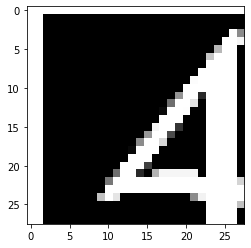

In [87]:
plt.figure()
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [88]:
IMG_SHAPE = X_train.shape[1:]

In [90]:
model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=IMG_SHAPE))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

In [91]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_26 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 12, 12, 64)       0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
Total params: 18,816
Trainable params: 18,816
Non-trainable params: 0
_________________________________________________________________


In [92]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(9))

In [93]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=1, 
                    validation_data=(X_test,y_test))

225/225 [==============================] - 5s 20ms/step - loss: 4.2526 - accuracy: 0.8350 - val_loss: 0.1971 - val_accuracy: 0.9428


In [94]:
model.save("model.h5")

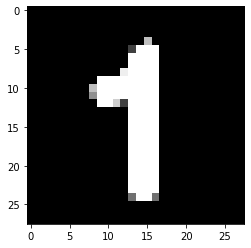

In [95]:
test_image = cv.imread("Box.png")
test_image = cv.resize(test_image,(28,28))
plt.figure()
plt.imshow(test_image)
plt.show()

In [96]:
test_image = np.expand_dims(test_image, axis=0)
np.argmax(model.predict(test_image))

ValueError: in user code:

    File "/home/karol/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1801, in predict_function  *
        return step_function(self, iterator)
    File "/home/karol/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1790, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/karol/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1783, in run_step  **
        outputs = model.predict_step(data)
    File "/home/karol/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1751, in predict_step
        return self(x, training=False)
    File "/home/karol/.local/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/karol/.local/lib/python3.8/site-packages/keras/engine/input_spec.py", line 248, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_10" (type Sequential).
    
    Input 0 of layer "conv2d_25" is incompatible with the layer: expected axis -1 of input shape to have value 1, but received input with shape (None, 28, 28, 3)
    
    Call arguments received:
      • inputs=tf.Tensor(shape=(None, 28, 28, 3), dtype=uint8)
      • training=False
      • mask=None
